# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import json
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [31]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)
cities

['port-gentil',
 'bengkulu',
 'znamenskoye',
 'tsogni',
 'cherskiy',
 'kapaa',
 'bluff',
 'ritchie',
 'cabo san lucas',
 'victoria',
 'mataura',
 'nieves',
 'bilma',
 'anyang',
 'meulaboh',
 'ushuaia',
 'narsaq',
 'taolanaro',
 'avarua',
 'alakurtti',
 'chuy',
 'albany',
 'hithadhoo',
 'thompson',
 'nampula',
 'swan hill',
 'saleaula',
 'tsihombe',
 'sao felix do xingu',
 'vila velha',
 'artigas',
 'pemba',
 'pevek',
 'vaini',
 'punta arenas',
 'samusu',
 'saint george',
 'hilo',
 'derzhavinsk',
 'chokurdakh',
 'hervey bay',
 'saint-joseph',
 'huinan',
 'rikitea',
 'tommot',
 'port alfred',
 'busselton',
 'torbay',
 'hobart',
 'tolyatti',
 'faanui',
 'belushya guba',
 'puerto ayora',
 'puerto narino',
 'kyaikto',
 'touros',
 'tuktoyaktuk',
 'bethel',
 'eureka',
 'gawler',
 'atuona',
 'damghan',
 'doha',
 'cape town',
 'sakakah',
 'domoni',
 'roald',
 'polunochnoye',
 'port elizabeth',
 'saint-philippe',
 'simbahan',
 'saint-augustin',
 'san patricio',
 'hermanus',
 'bredasdorp',
 'cidr

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [29]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

query_url = f"{url}appid={weather_api_key}&units={units}&q="
lat = []
lon = []
temp_max = []
humidity = []
cloud = []
wind = []
dt = []
print("Beginning Data Retrieval")
print("-----------------------------------")
for city in cities:
    city_query = query_url + city
    response = requests.get(city_query).json()
    
    city_lat = response['coord']['lat']
    city_lon = response['coord']['lon']
    city_max_temp = response['main']['temp_max']
    city_humidity = response['main']['humidity']
    city_cloud = response['clouds']['all']
    city_wind_speed = response['wind']['speed']
    city_date = response['dt']
    
    lat.append(city_lat)
    lon.append(city_lon)
    temp_max.append(city_max_temp)
    humidity.append(city_humidity)
    cloud.append(city_cloud)
    wind.append(city_wind_speed)
    dt.append(city_date)
    
    print(f"Processing Record of Set | {city} {city_lat} {city_lon} {city_max_temp} {city_humidity} {city_cloud} {city_wind_speed} {city_date}")

Beginning Data Retrieval
-----------------------------------
Processing Record of Set | albany 42.6 -73.97 11.67 54 0 0.45 1602195405
Processing Record of Set | shingu 33.73 135.98 19.46 93 100 12.9 1602195430
Processing Record of Set | clyde river 70.47 -68.59 -7 92 75 5.1 1602195431
Processing Record of Set | mataura -46.19 168.86 11.11 66 2 0.89 1602195431


KeyError: 'coord'

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [30]:
weather_data = pd.DataFrame({"City": city, "Lat": lat, "Lng": lon, "Max Temp": temp_max, 
                "Humidity": humidity, "Cloudiness": cloud, "Wind Speed": wind,
                "Date": dt
               })

weather_data.to_csv("cities.csv")
weather_data


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
0,taolanaro,42.60,-73.97,11.67,54,0,0.45,1602195405
1,taolanaro,33.73,135.98,19.46,93,100,12.90,1602195430
2,taolanaro,70.47,-68.59,-7.00,92,75,5.10,1602195431
3,taolanaro,-46.19,168.86,11.11,66,2,0.89,1602195431


In [21]:
weather_data.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,4.000000,4.000000,4.000000,4.00000,4.000000,4.000000,4.000000e+00
mean,25.152500,40.570000,9.030000,77.50000,44.250000,4.447500,1.602194e+09
std,50.071339,129.867509,10.262716,19.33046,50.979571,5.741576,1.883923e+01
min,-46.190000,-73.970000,-5.000000,52.00000,0.000000,0.450000,1.602194e+09
25%,13.750000,-69.935000,5.830000,67.75000,1.500000,1.117500,1.602194e+09
50%,38.165000,33.695000,10.830000,82.50000,38.500000,2.220000,1.602194e+09
75%,49.567500,144.200000,14.030000,92.25000,81.250000,5.550000,1.602194e+09
max,70.470000,168.860000,19.460000,93.00000,100.000000,12.900000,1.602194e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,5.500000e+02
mean,19.973545,17.124400,58.331400,67.890909,52.141818,8.544800,1.585764e+09
std,33.284840,91.595451,25.795297,20.864881,35.766469,6.078869,5.539674e+01
min,-54.800000,-179.170000,-11.340000,9.000000,0.000000,0.160000,1.585764e+09
25%,-8.077500,-64.627500,42.800000,55.000000,20.000000,4.525000,1.585764e+09
50%,23.630000,19.635000,64.940000,72.000000,57.000000,7.325000,1.585764e+09
75%,48.672500,97.350000,78.800000,83.000000,86.750000,11.410000,1.585764e+09
max,78.220000,179.320000,102.200000,100.000000,100.000000,46.080000,1.585764e+09


In [17]:
#  Get the indices of cities that have humidity over 100%.


Int64Index([], dtype='int64')

In [19]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,butaritari,3.07,172.79,83.32,74,84,10.42,KI,1593605283
1,yerbogachen,61.28,108.01,79.52,58,20,7.70,RU,1593605121
2,cape town,-33.93,18.42,73.00,77,27,4.70,ZA,1593605039
3,touba,8.28,-7.68,79.97,75,82,3.58,CI,1593605284
4,jamestown,42.10,-79.24,64.00,88,1,6.93,US,1593605284


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

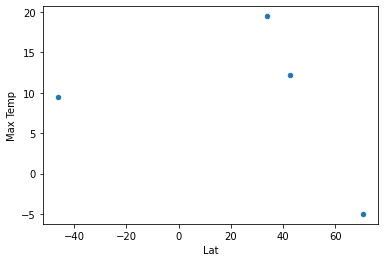

In [23]:
weather_data.plot(kind='scatter', x='Lat', y='Max Temp')


## Latitude vs. Humidity Plot

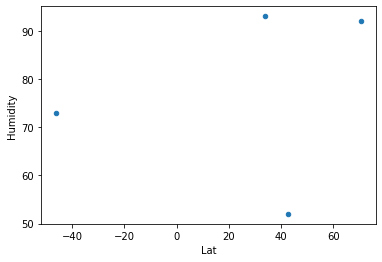

In [24]:
weather_data.plot(kind='scatter', x='Lat', y='Humidity')

## Latitude vs. Cloudiness Plot

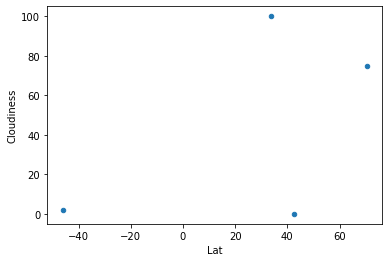

In [26]:
weather_data.plot(kind='scatter', x='Lat', y='Cloudiness')

## Latitude vs. Wind Speed Plot

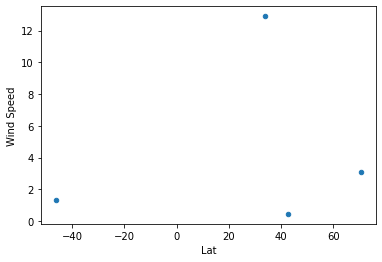

In [27]:
weather_data.plot(kind='scatter', x='Lat', y='Wind Speed')

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.46937863826630627


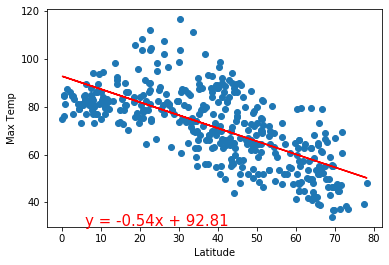

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.6082708688906918


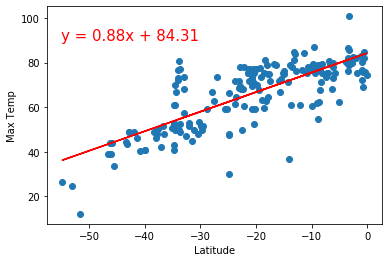

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.000543987878808455


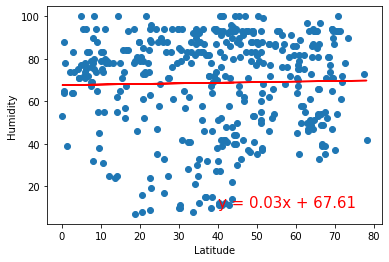

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.014985174297345524


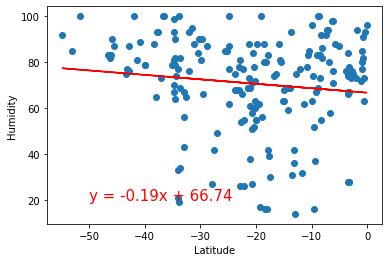

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0020898727664228514


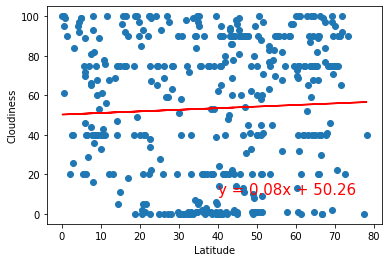

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0035263772085582894


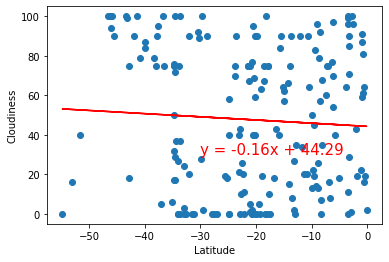

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.04019723576144484


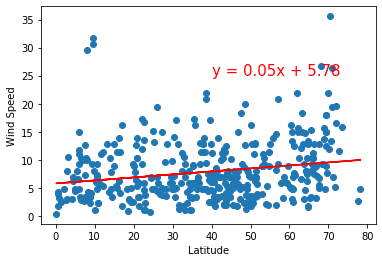

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.017128274759839232


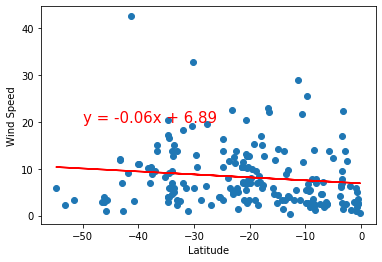